In [1]:
import param
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension()

In [2]:
# make plots static
%matplotlib inline

In [3]:
# read file
df = pd.read_csv('./data/us-counties.csv')

In [4]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [5]:
# remove nan and null
df.dropna(inplace = True)

In [6]:
# convert to states
df_date = df.groupby(['date','state']).sum()
df_date = pd.DataFrame(df_date)
df_date = df_date.reset_index()

In [7]:
df_date.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53061.0,1,0.0
1,2020-01-22,Washington,53061.0,1,0.0
2,2020-01-23,Washington,53061.0,1,0.0
3,2020-01-24,Illinois,17031.0,1,0.0
4,2020-01-24,Washington,53061.0,1,0.0


In [8]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18640 entries, 0 to 18639
Data columns (total 5 columns):
date      18640 non-null object
state     18640 non-null object
fips      18640 non-null float64
cases     18640 non-null int64
deaths    18640 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 728.2+ KB


In [9]:
df_date['date'] = pd.to_datetime(df_date['date'])

In [10]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18640 entries, 0 to 18639
Data columns (total 5 columns):
date      18640 non-null datetime64[ns]
state     18640 non-null object
fips      18640 non-null float64
cases     18640 non-null int64
deaths    18640 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 728.2+ KB


In [11]:
df_date['month_year'] = df_date['date'].dt.strftime('%Y-%m')

In [12]:
df_date.head(3)

,date,state,fips,cases,deaths,month_year
0,2020-01-21,Washington,53061.0,1,0.0,2020-01
1,2020-01-22,Washington,53061.0,1,0.0,2020-01
2,2020-01-23,Washington,53061.0,1,0.0,2020-01


In [13]:
codes = {
    '2020-01' : '2020 January',
    '2020-02' : '2020 February',
    '2020-03' : '2020 March',
    '2020-04' : '2020 April',
    '2020-05' : '2020 May',
    '2020-06' : '2020 June',
    '2020-07' : '2020 July',
    '2020-08' : '2020 August',
    '2020-09' : '2020 September',
    '2020-10' : '2020 October',
    '2020-11' : '2020 November',
    '2020-12' : '2020 December',
    '2021-01' : '2021 January',
    '2021-02' : '2021 February',
}

In [14]:
df_date['month_year'] = df_date['month_year'].apply(lambda x : codes[x])

In [15]:
df_date.shape

(18640, 6)

In [16]:
df_date.head()

,date,state,fips,cases,deaths,month_year
0,2020-01-21,Washington,53061.0,1,0.0,2020 January
1,2020-01-22,Washington,53061.0,1,0.0,2020 January
2,2020-01-23,Washington,53061.0,1,0.0,2020 January
3,2020-01-24,Illinois,17031.0,1,0.0,2020 January
4,2020-01-24,Washington,53061.0,1,0.0,2020 January


In [17]:
df_date.drop('date', axis = 1, inplace=True)

In [18]:
df_date = df_date.groupby(['month_year','state']).sum()

In [19]:
df_date = pd.DataFrame(df_date)
df_date = df_date.reset_index()
df_date

,month_year,state,fips,cases,deaths
0,2020 April,Alabama,2118984.0,125166,4044.0
1,2020 April,Alaska,734655.0,8229,173.0
2,2020 April,Arizona,1806240.0,128668,4798.0
3,2020 April,Arkansas,10526992.0,51355,1002.0
4,2020 April,California,9600973.0,865583,30173.0
...,...,...,...,...,...
640,2021 January,Virginia,211361441.0,13357007,176941.0
641,2021 January,Washington,64124151.0,8942940,122774.0
642,2021 January,West Virginia,92163775.0,3300070,53239.0
643,2021 January,Wisconsin,122918689.0,17417378,181152.0


In [20]:
# convert to states
df_county = df.groupby('county').sum()
df_county = pd.DataFrame(df_county)
df_county = df_county.reset_index()#level=0, inplace=True)

In [21]:
df_county.columns

Index(['county', 'fips', 'cases', 'deaths'], dtype='object')

In [22]:
df_date.columns

Index(['month_year', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [26]:
df_date.month_year.unique()

array(['2020 April', '2020 August', '2020 December', '2020 February',
       '2020 January', '2020 July', '2020 June', '2020 March', '2020 May',
       '2020 November', '2020 October', '2020 September', '2021 February',
       '2021 January'], dtype=object)

In [28]:
class_df = df_date[(df_date.month_year==df_date.month_year)].copy()
class_df

,month_year,state,fips,cases,deaths
0,2020 April,Alabama,2118984.0,125166,4044.0
1,2020 April,Alaska,734655.0,8229,173.0
2,2020 April,Arizona,1806240.0,128668,4798.0
3,2020 April,Arkansas,10526992.0,51355,1002.0
4,2020 April,California,9600973.0,865583,30173.0
...,...,...,...,...,...
640,2021 January,Virginia,211361441.0,13357007,176941.0
641,2021 January,Washington,64124151.0,8942940,122774.0
642,2021 January,West Virginia,92163775.0,3300070,53239.0
643,2021 January,Wisconsin,122918689.0,17417378,181152.0


In [102]:
df1 = df_date.sort_values(by = ['cases'], ascending=False)[0:10]
#df1 = pd.DataFrame(df1)
#df1 = df1.reset_index()
#df1.loc['state','cases']
df1.columns

Index(['month_year', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [105]:
df1[['state','cases']]

,state,cases
596,California,90315276
543,California,65405647
636,Texas,64910955
109,California,53958843
583,Texas,47911034
601,Florida,47786332
149,Texas,47238530
114,Florida,35857385
548,Florida,34072990
424,Texas,33105809


In [106]:
# create a class containing  selector drop-down, various plots, and a data table output
class CovidDashboard(param.Parameterized):
    
    # drop down selector widget containing the list of date, with the default being '2020 April'
    month_year = param.ObjectSelector(default='2020 April', objects=list(df_date.month_year.unique()))
    
    # create data set containing only the data applicable to the date in the drop down selector
    def get_data(self):
        class_df = df_date[(df_date.month_year==self.month_year)].copy()
        return class_df
    
    # seaborn box plot for the chosen date
    def box_view(self):
        data = self.get_data() 
        df1 = data.sort_values(by = ['cases'], ascending=False)[0:10]
        ax = plt.figure(figsize=(8,5))
        ax = sns.barplot(x='state', y='cases', data=df1, palette = 'magma')
        ax.set_xticklabels(ax.get_xticklabels(),rotation=60, horizontalalignment='right')
        plt.close()
        return ax.figure
    
    # table of data for the chosen date
    def table_view(self):
        data = self.get_data()
        df1 = data.sort_values(by = ['cases'], ascending=False)[0:10]
        return df1[['state','cases']]

In [107]:
# create an instance of the class
db = CovidDashboard(name='')

# create a title for the dashboard
dashboard_title = '# COVID-19 cases in US'

# create some text describing the dashboard
dashboard_desc = 'An example of a simple interactive HoloViz Panel dashboard.'

In [108]:
# create a dashboard, defining the layout as one column containing the
# dashboard title, dashboard description, 'date' drop down selector,
# box plot, and data table
dashboard = pn.Column(dashboard_title, 
                      dashboard_desc,   
                      db.param,       # 
                      db.box_view,    # box plot
                      db.table_view   # data table
                     )


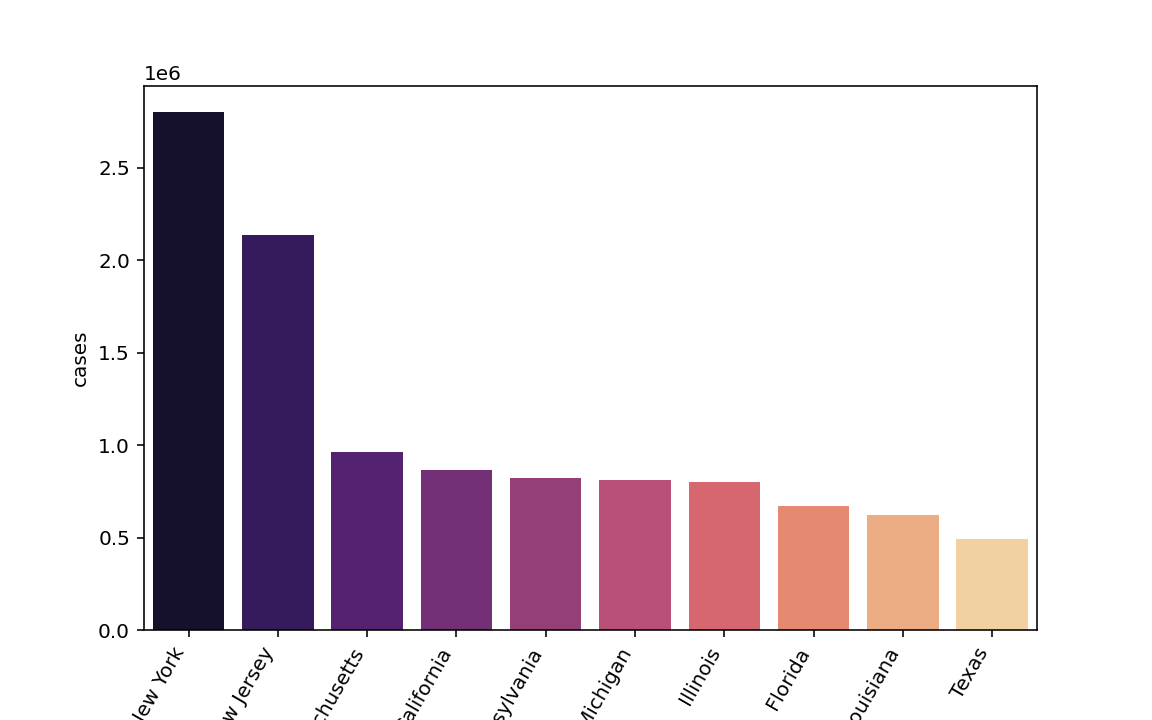
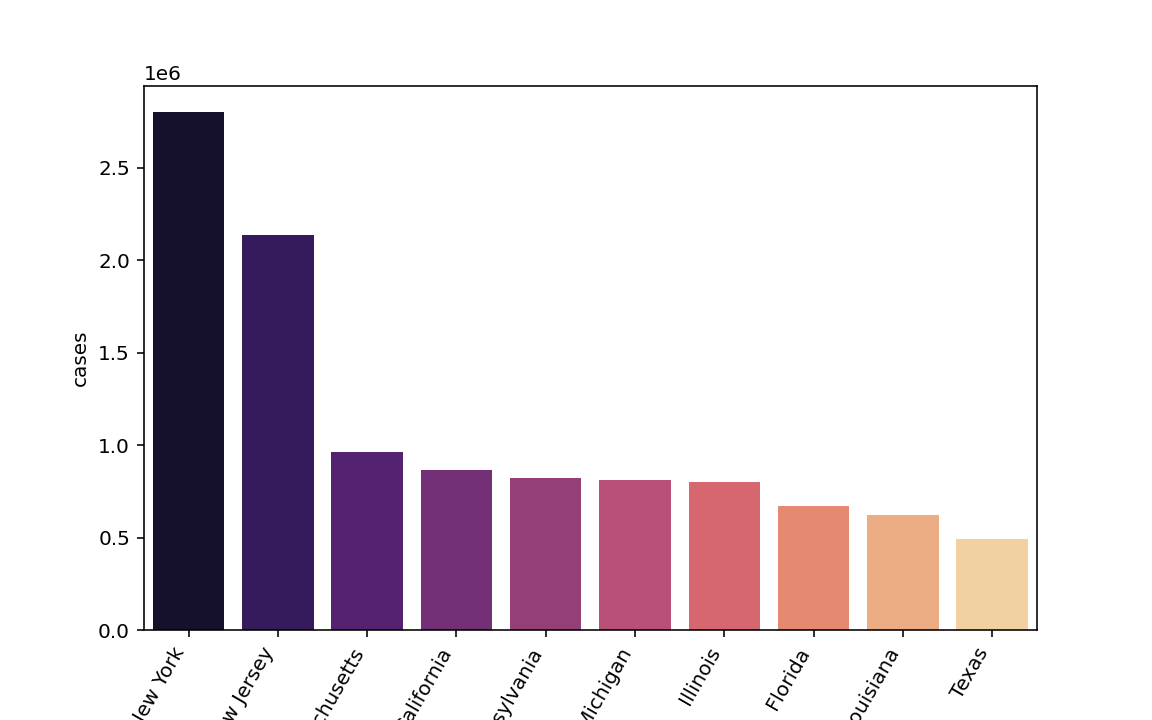
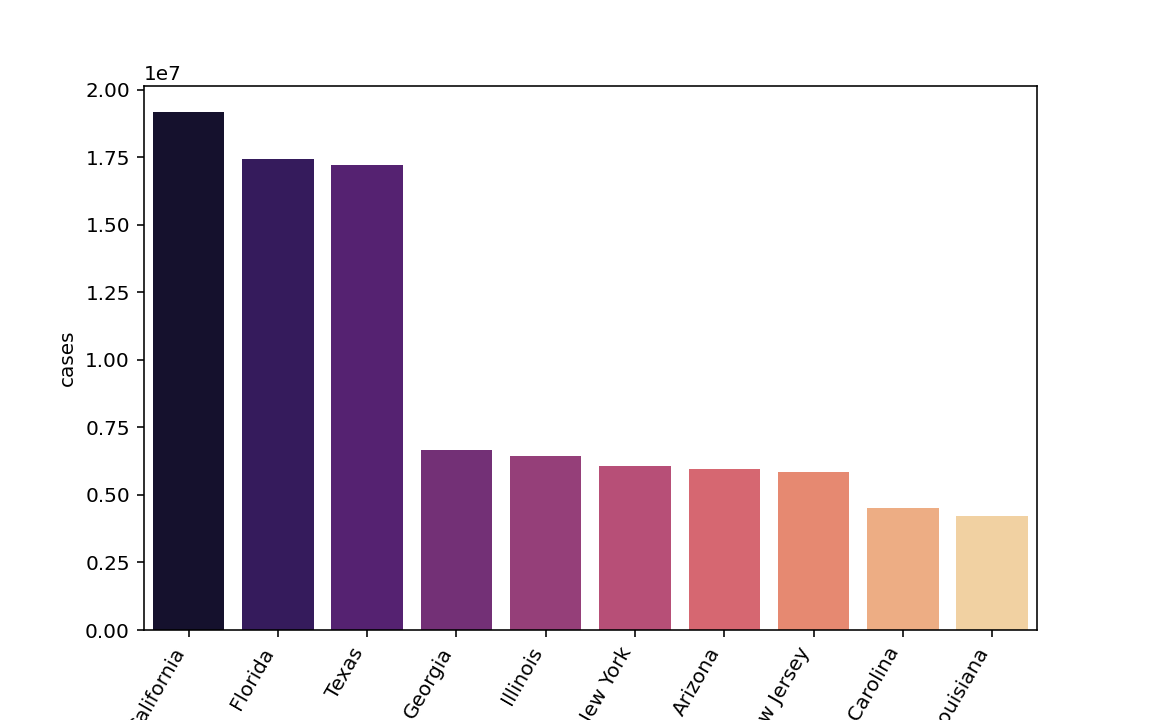
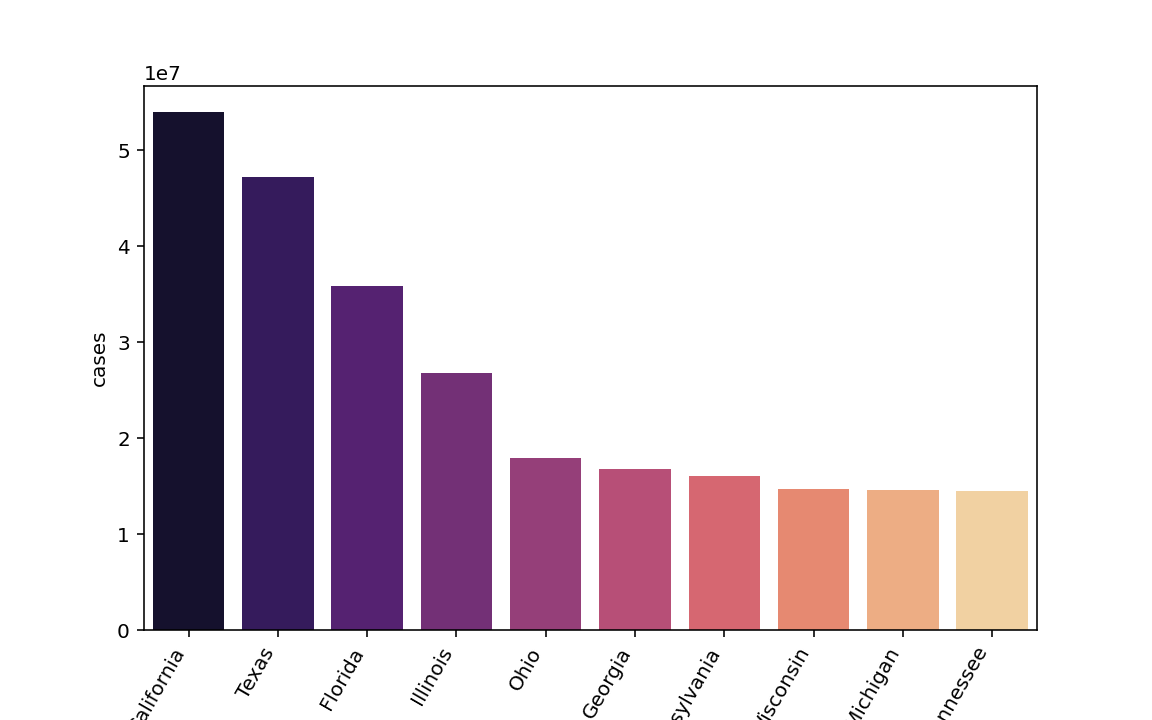
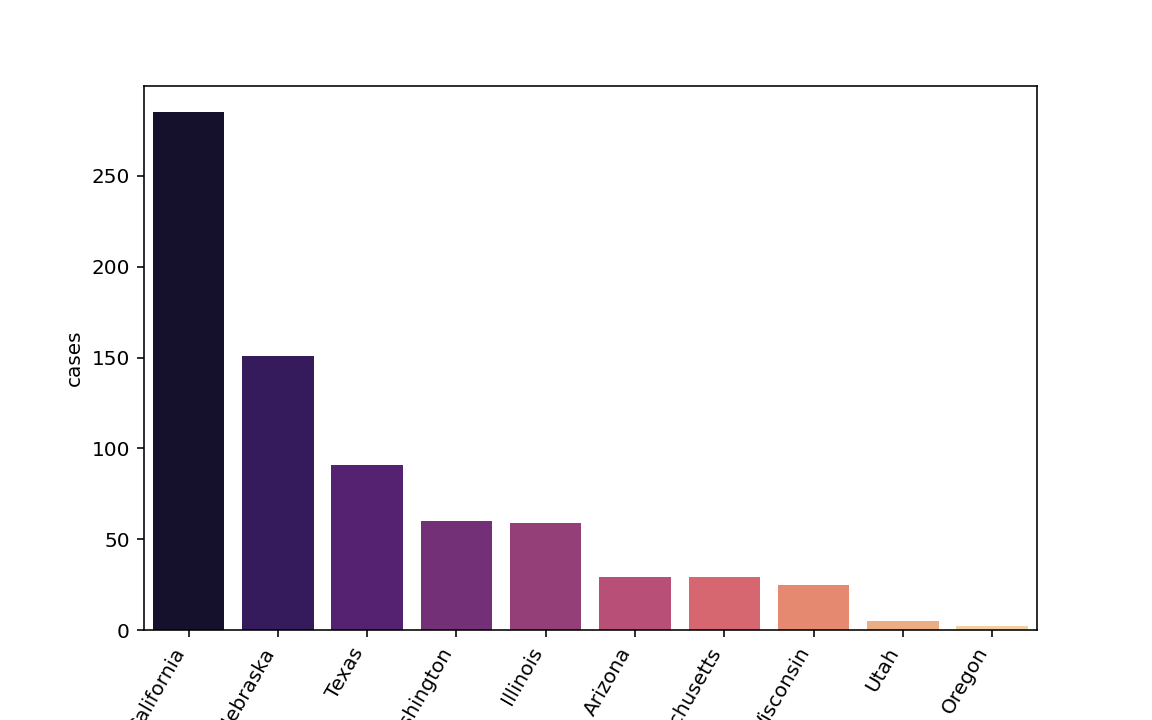
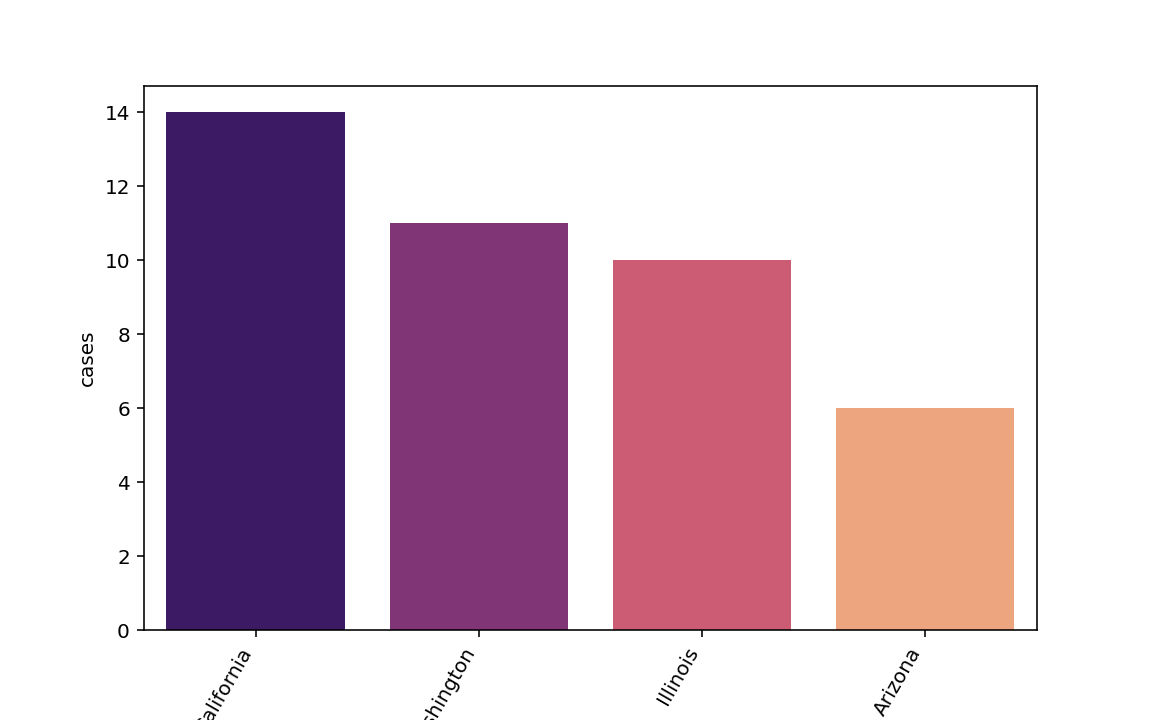
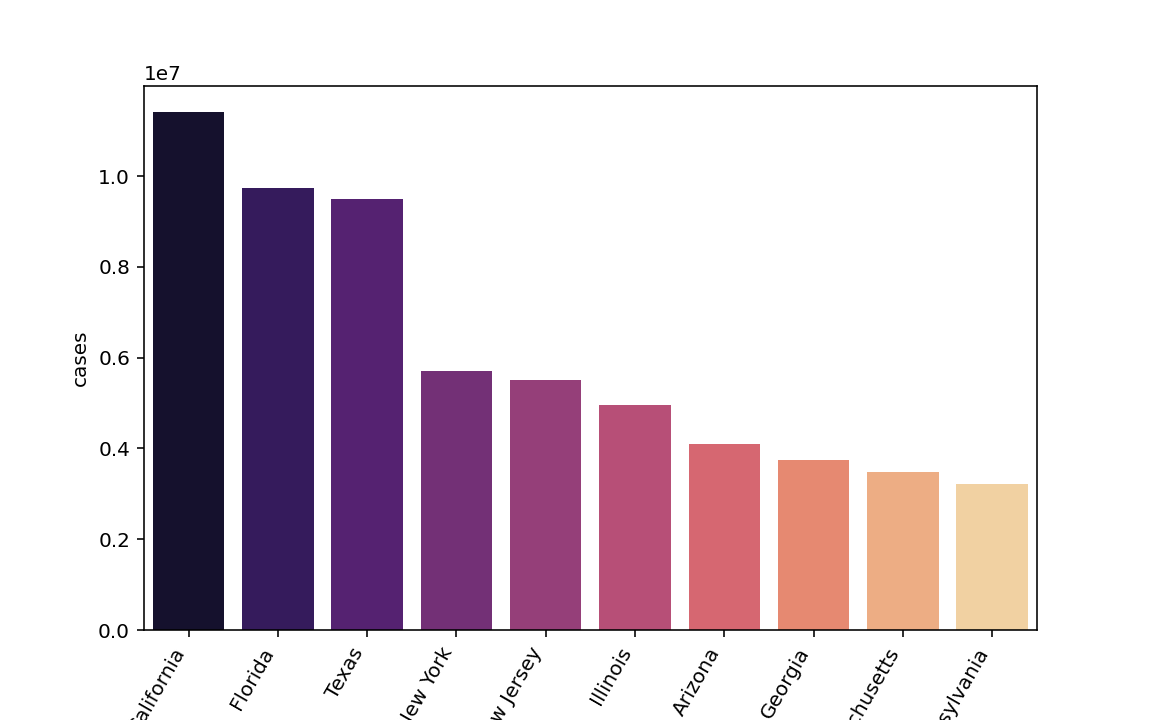
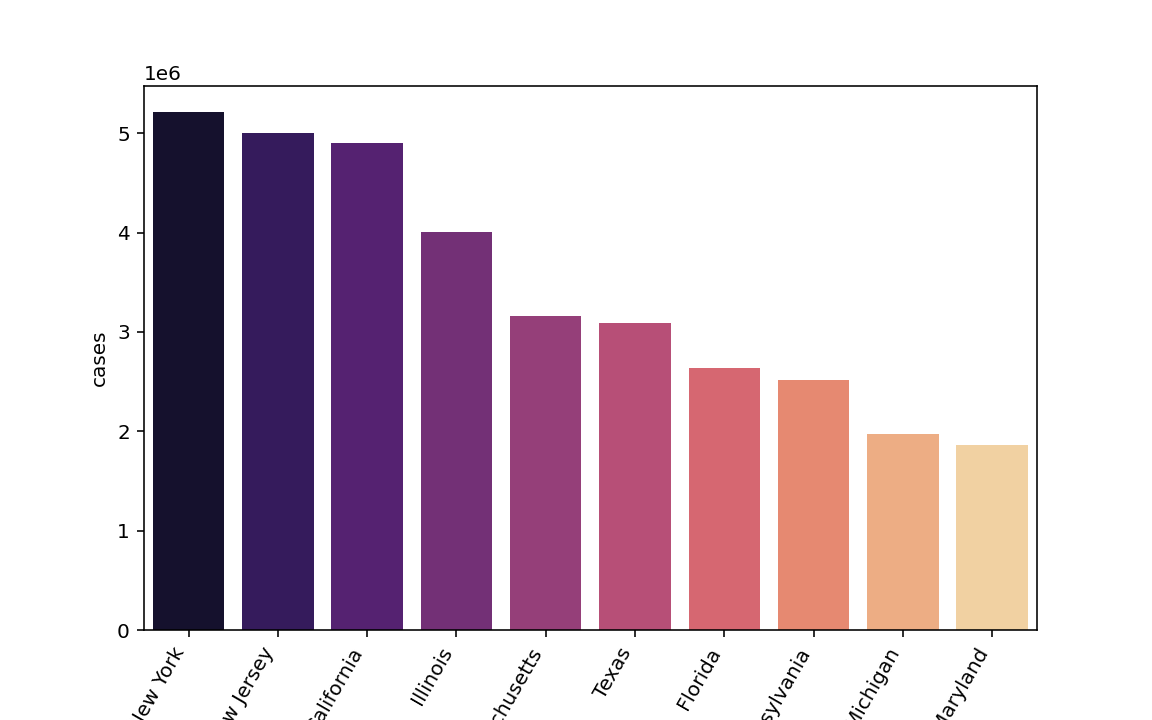
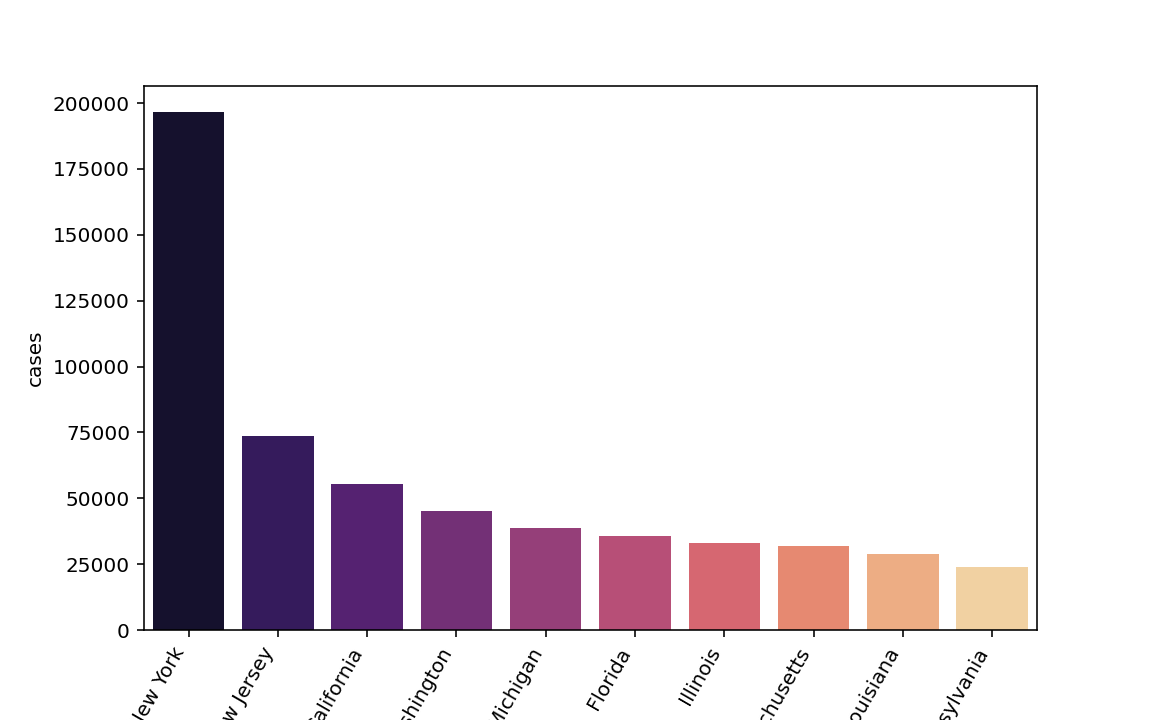
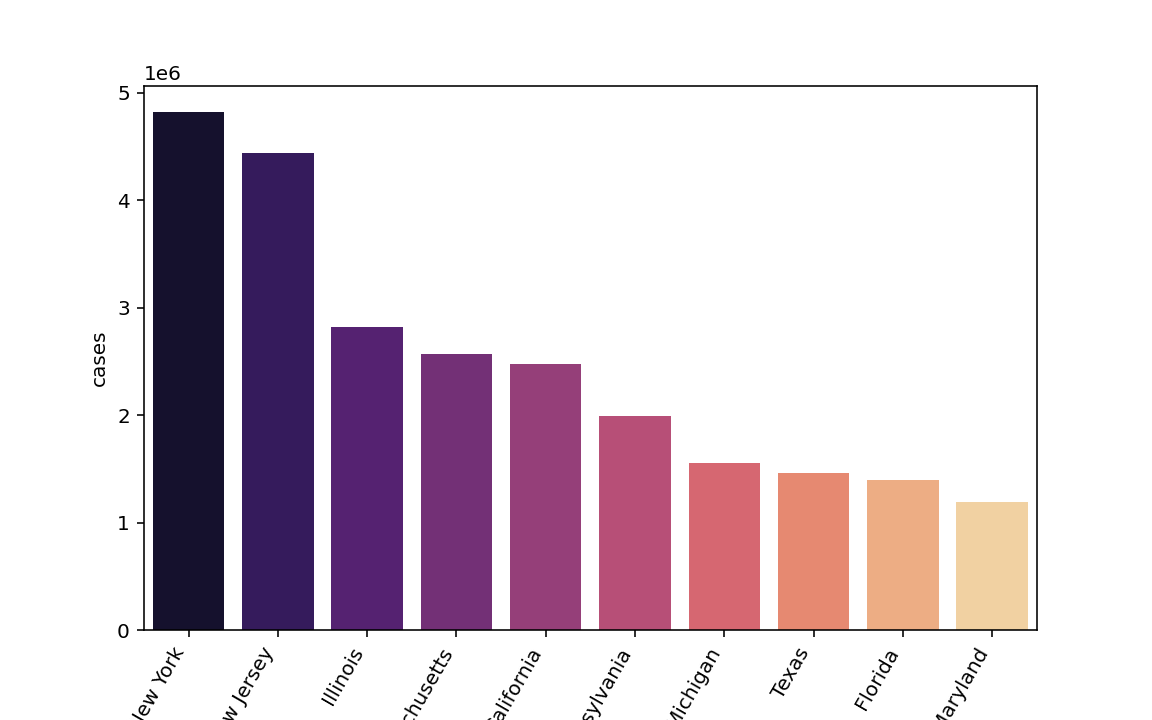
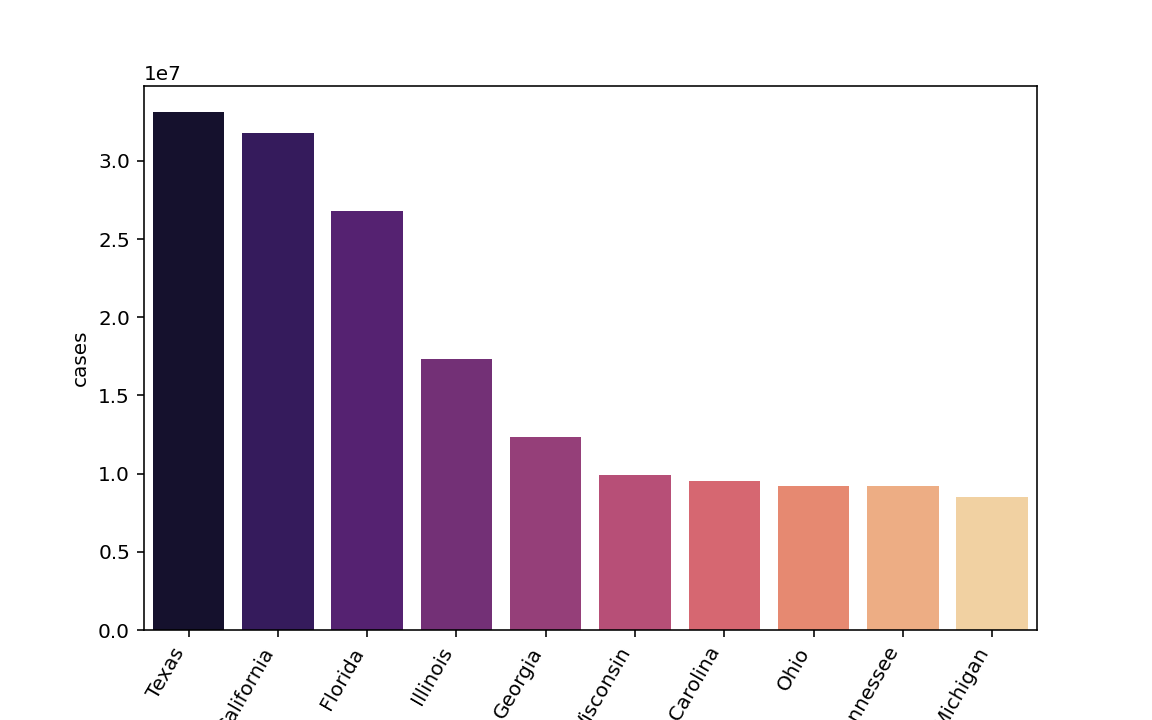
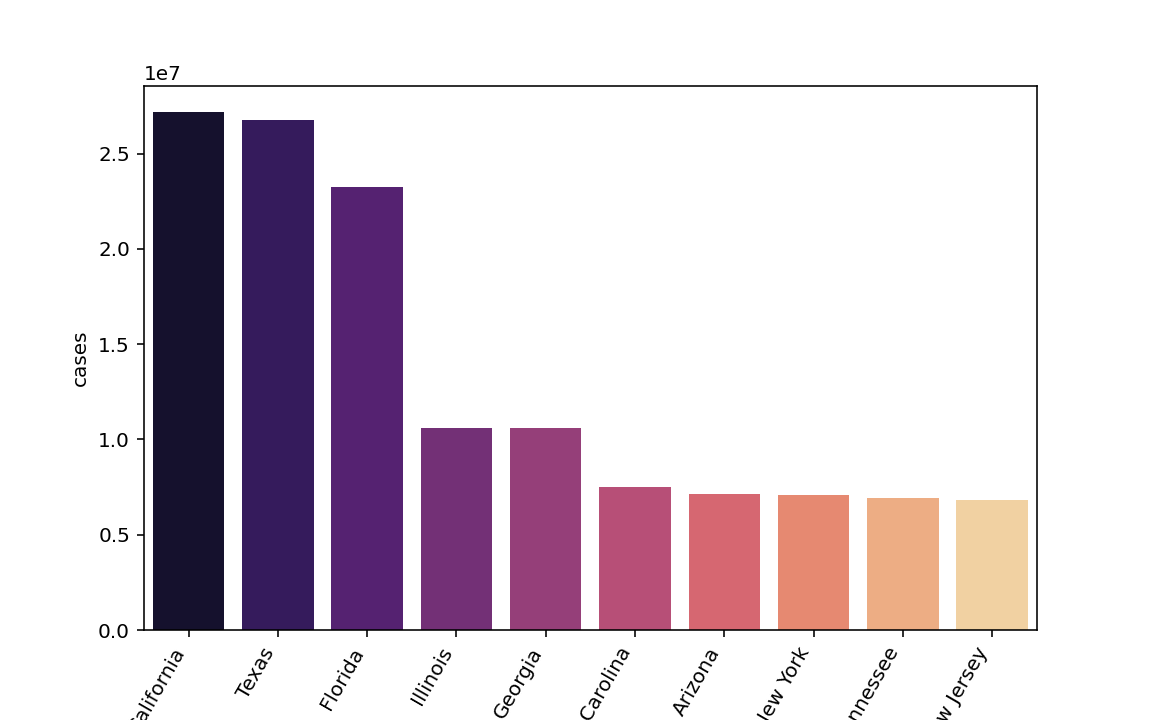
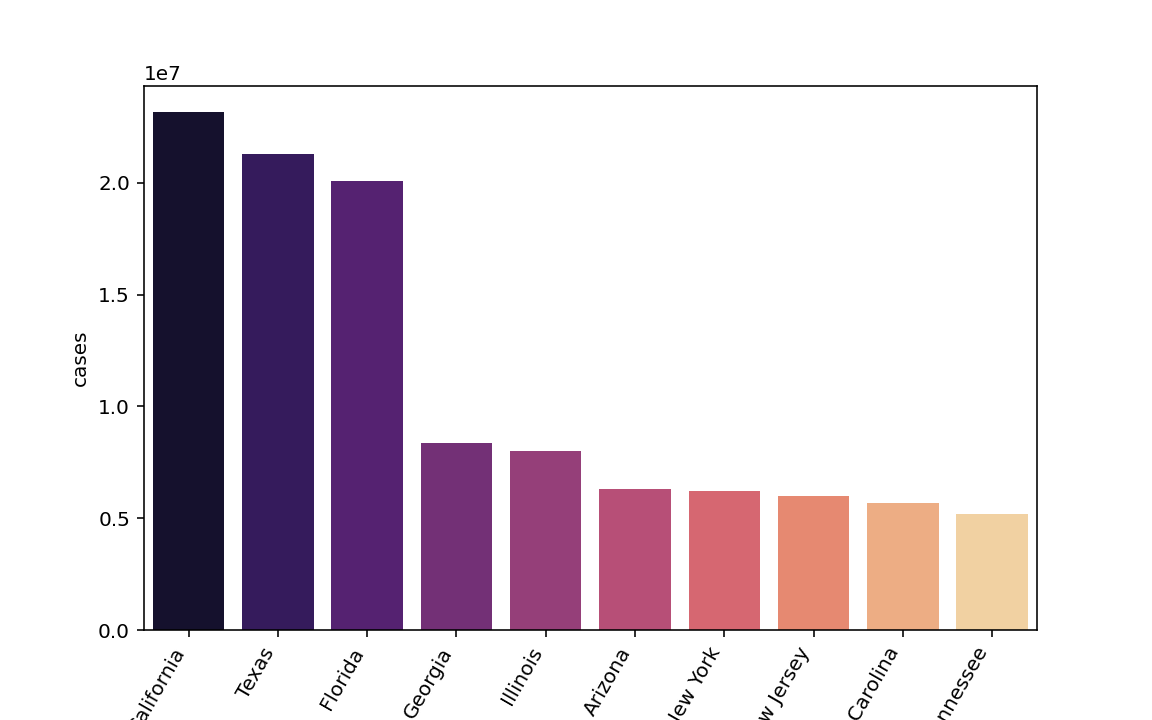
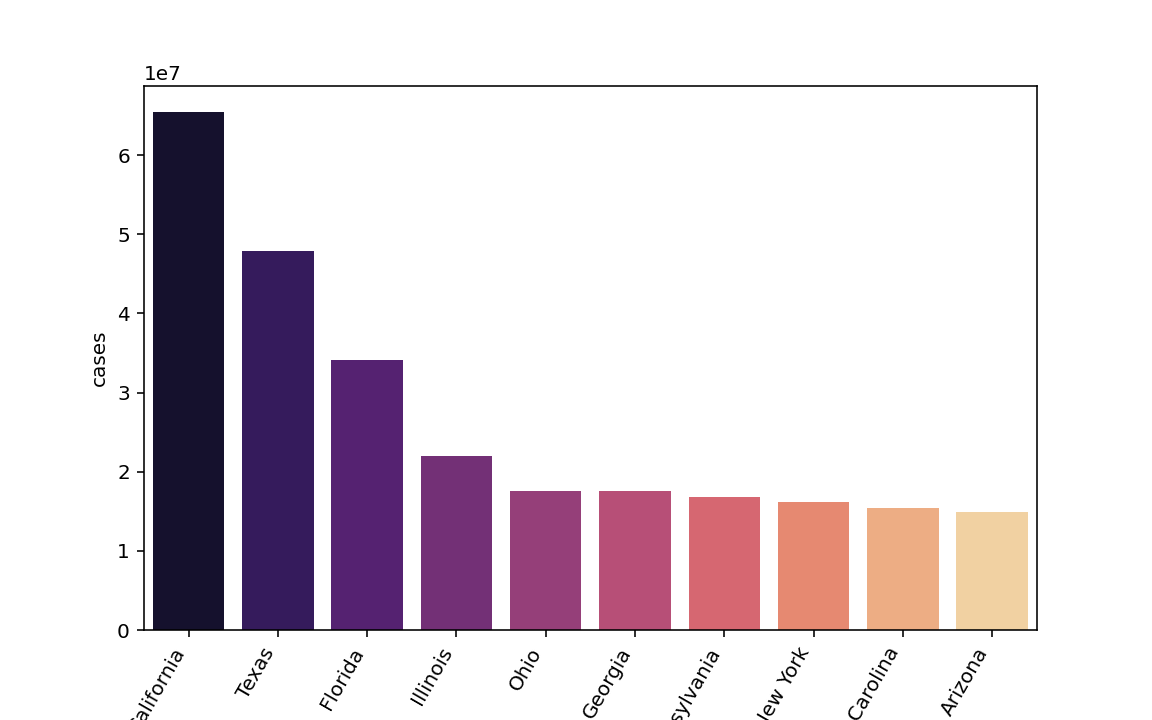
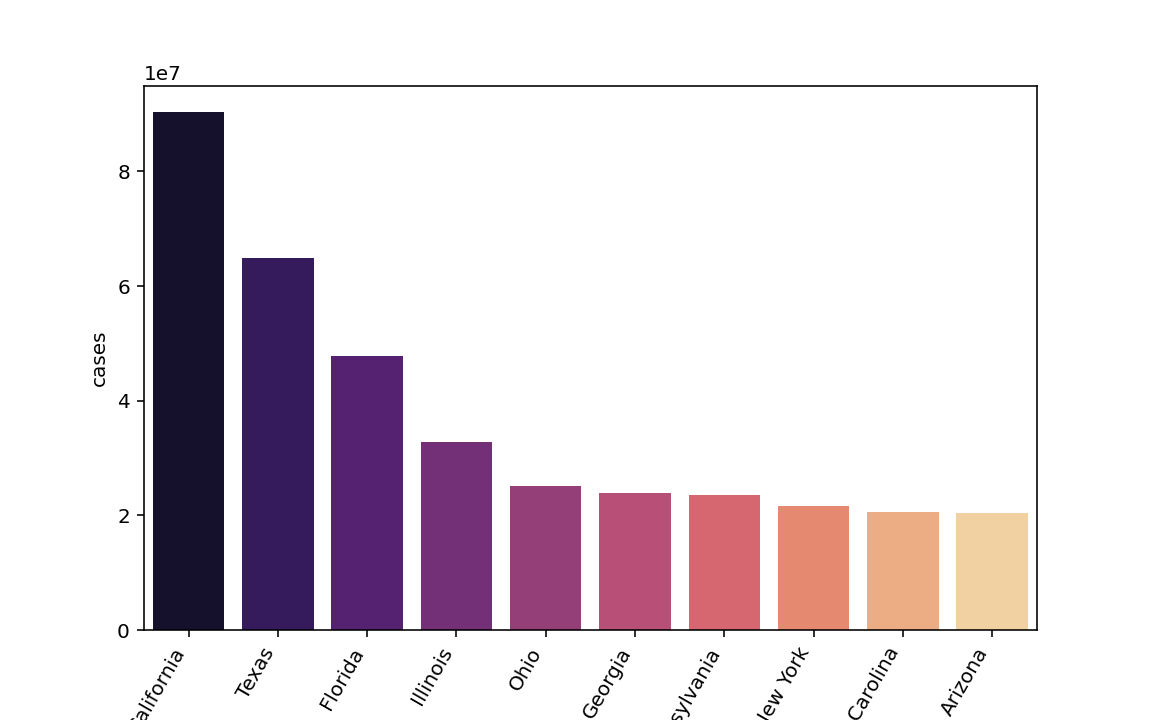

In [109]:
dashboard.embed()

In [ ]:
png = pn.panel('https://ewscripps.brightspotcdn.com/dims4/default/ff2ea6e/2147483647/strip/true/crop/1280x720+0+0/resize/1280x720!/quality/90/?url=http%3A%2F%2Fewscripps-brightspot.s3.amazonaws.com%2F9b%2F1c%2Fd6365aa54b5687a3cb1386a180db%2Fupdate-coronavirus-colorado-live-blog-covid19.png', width=300)

In [ ]:
png

In [ ]:
import holoviews as hv
import holoviews.plotting.bokeh

from bokeh.plotting import figure

fig = figure()
fig.scatter([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 2, 1, 0, -1, -2, -3])

gspec = pn.GridSpec(sizing_mode='stretch_both', max_height=800)

gspec[0, :3] = 'https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png'

#gspec[0, :3] = pn.Spacer(background='#FF1230')
gspec[1:3, 0] = pn.Spacer(background='#0000FF')
gspec[1:3, 1:3] = fig
gspec[3:5, 0] = hv.Curve([1, 2, 3])
gspec[3:5, 1] = 'https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png'
gspec[4:5, 2] = pn.Column(
    pn.widgets.FloatSlider(),
    pn.widgets.ColorPicker(),
    pn.widgets.Toggle(name='Toggle Me!'))

gspec